# Implementar un MLP con Backpropagation para resolver el problema de la función XOR 

<img src="figs/fig-MLP_XOR.png" width="50%">


1. **Definir la arquitectura de la red**:  
   - La red tendrá 2 entradas (los valores binarios del XOR), una capa oculta con 2 neuronas, y una neurona de salida.
   - Usar la función de activación sigmoide en las neuronas de la capa oculta y de salida.
   - Establecer una tasa de aprendizaje (ej. 0.5) y el número de épocas de entrenamiento.

   Por ejemplo, para la capa de salida (2 neuronas en la capa oculta, 1 neurona de salida):
 $$ W^{(2)} \in \mathbb{R}^{1 \times 2} $$
 $$ b^{(2)} \in \mathbb{R}^{1 \times 1} $$

2. **Inicializar los pesos y los sesgos**:  
   - Inicializar los pesos de las conexiones de la capa de entrada a la capa oculta y de la capa oculta a la capa de salida, de manera aleatoria (puedes usar la inicialización Xavier).
   - También inicializar los sesgos de cada capa.

3. **Propagación hacia adelante (Forward pass)**:  
   - Para cada entrada, multiplicar las entradas por los pesos de la capa oculta y sumar el sesgo.
   - Aplicar la función de activación (sigmoide) para obtener las activaciones de la capa oculta.
   - Repetir el proceso con los valores de la capa oculta para calcular la activación de la capa de salida.

4. **Calcular el error**:  
   - Calcular el error en la salida utilizando una función de error, como el Error Cuadrático Medio (MSE).

5. **Backpropagation (Propagación hacia atrás)**:  
   - Calcular los gradientes de error en la capa de salida
   - Propagar el error hacia la capa oculta, calculando el gradiente de error en la capa oculta.
   
6. **Actualizar los pesos y sesgos**:  
   - Usar los gradientes obtenidos para ajustar los pesos y los sesgos de la capa de salida y de la capa oculta utilizando el gradiente descendente.
   
7. **Repetir el entrenamiento**:  
   - Repetir los pasos de forward, cálculo de error y backpropagation por el número de épocas definido hasta que el error disminuya significativamente.

8. **Evaluar el modelo**:  
   - Después del entrenamiento, probar la red con las entradas XOR y verificar que las salidas estén cerca de los valores esperados (0 o 1).
   






In [5]:
import numpy as np

# Función de activación sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la sigmoide,
# x es el np.array de las activaciones, solo se calcula la derivada.
def sigmoid_derivative(x):
    return x * (1 - x)

# Establece la semilla
def seed(random_state=33):
    np.random.seed(random_state)

def xavier_initialization(input_size, output_size):
    return np.random.normal(0, np.sqrt(2 / input_size), (input_size, output_size))

def create_minibatches(X, y, batch_size):
    """
    Genera los lotes de datos (batchs) de acuerdo al parámetro batch_size de forma aleatoria para el procesamiento. 
    """
    n_samples = X.shape[0]
    indices = np.random.permutation(n_samples)  # Mezcla los índices aleatoriamente
    X_shuffled, y_shuffled = X[indices], y[indices]  # Reordena X e y según los índices aleatorios
    
    # Divide los datos en minibatches
    for X_batch, y_batch in zip(np.array_split(X_shuffled, np.ceil(n_samples / batch_size)), 
                                np.array_split(y_shuffled, np.ceil(n_samples / batch_size))):
        yield X_batch, y_batch
    
class MLP_TODO:
    def __init__(self, num_entradas, num_neuronas_ocultas, num_salidas, epochs, batch_size=128, learning_rate=0.2, random_state=42):

        seed(33)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
        # Definir las capas
        self.W1 = xavier_initialization(num_neuronas_ocultas, num_entradas)
        self.B1 = np.zeros((1, num_neuronas_ocultas))
        self.W2 = xavier_initialization(num_salidas, num_neuronas_ocultas)
        self.B2 = np.zeros((1, num_salidas))

    def forward(self, X):
        #----------------------------------------------
        # 1. Propagación hacia adelante (Forward pass)
        #----------------------------------------------

        #Capa 1
        self.X = X
        self.z_c1 = self.X @ self.W1.T + self.B1
        self.B1 = np.sum(self.B1, axis=0, keepdims=True)
        self.a_c1 = sigmoid(self.z_c1)
        #Capa 2
        self.z_c2 = self.a_c1 @ self.W2.T + self.B2
        self.B2 = np.sum(self.B2 , axis=0, keepdims=True)
        self.y_pred = sigmoid(self.z_c2)
        return self.y_pred 

    def loss_function_MSE(self, y_pred, y):
        #----------------------------------------------
        # 2. Cálculo del error con MSE
        #----------------------------------------------

        self.y = y
        error = np.divide((y_pred - y) ** 2, 2 * y.shape[0])
        total_error =  np.sum(error)
        return total_error

    def backward(self):
        #----------------------------------------------
        # 3. Propagación hacia atrás (Backward pass)
        #----------------------------------------------

        #Derivada del Error respecto a y-hat
        self.dE_dy_pred = self.y_pred - self.y
        #Derivada de y-hat respecto a y
        self.dy_pred_dz_c2 = sigmoid_derivative(self.y_pred)

        # Nota: delta_c2 es delta chiquita, grad_c2 es el gradiente, o la delta grande
        self.delta_c2 = self.dE_dy_pred * self.dy_pred_dz_c2
        self.grad_c2 = self.delta_c2.T @ self.a_c1

        self.delta_c1 = self.delta_c2 @ self.W2 * sigmoid_derivative(self.a_c1)
        self.grad_c1 = self.delta_c1.T @ self.X

    def update(self):
        #----------------------------------------------
        # Actualización de pesos y bias
        #---------------------------------------------- 
        
        self.W2 =  self.W2 -  self.learning_rate * self.grad_c2
        self.B2 =  self.B2 - self.learning_rate * np.sum(self.delta_c2, axis=0, keepdims=True)
        
        self.W1 = self.W1 - self.learning_rate * self.grad_c1
        self.B1 = self.B1 - self.learning_rate * np.sum(self.delta_c1, axis=0, keepdims=True)

    def predict(self, X):
        y_pred = self.forward(X)
        # Obtener la clase para el clasificador binario
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        return y_pred

    def train(self, X, Y):
        self.epochs_error = []
        for epoch in range(self.epochs):
            num_batch = 0
            epoch_error  = 0
            for X_batch, y_batch in create_minibatches(X, Y, self.batch_size):
                y_pred = self.forward(X_batch)
                error = self.loss_function_MSE(y_pred, y_batch)
                epoch_error += error    
                self.backward()
                self.update()
                num_batch += 1
                # Imprimir el error cada N épocas
                if epoch % 100 == 0:
                    print(f"Época {epoch}, Error batch {num_batch}: {error}")
            self.epochs_error.append(epoch_error)
            if epoch % 100 == 0:
                    print(f"Época {epoch}, Error: {epoch_error/num_batch}")     

In [12]:
# Entradas para XOR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Salidas para XOR
y = np.array([[0], 
              [1], 
              [1], 
              [0]])

entradas = 2
neuronas_ocultas = 2
salidas = 1
batch_size = 2 # X.shape[0] # Batch de todos los ejemplos
learning_rate = 0.5
epochs = 1000
clasificador = MLP_TODO(entradas, neuronas_ocultas, salidas, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)
clasificador.train(X,y)

Época 0, Error batch 1: 0.1201736175917347
Época 0, Error batch 2: 0.13117157108960492
Época 0, Error: 0.1256725943406698
Época 100, Error batch 1: 0.12472382293997426
Época 100, Error batch 2: 0.14038734752909707
Época 100, Error: 0.13255558523453567
Época 200, Error batch 1: 0.1209169266291844
Época 200, Error batch 2: 0.13150265391635896
Época 200, Error: 0.12620979027277168
Época 300, Error batch 1: 0.13565167279457707
Época 300, Error batch 2: 0.07799797094608209
Época 300, Error: 0.10682482187032957
Época 400, Error batch 1: 0.05632171816593512
Época 400, Error batch 2: 0.13280987941540143
Época 400, Error: 0.09456579879066827
Época 500, Error batch 1: 0.06656085638267645
Época 500, Error batch 2: 0.10957993670916388
Época 500, Error: 0.08807039654592017
Época 600, Error batch 1: 0.043451534285729586
Época 600, Error batch 2: 0.09870699699937856
Época 600, Error: 0.07107926564255407
Época 700, Error batch 1: 0.049884791738389785
Época 700, Error batch 2: 0.04272128856263052
Época

In [13]:
#Ejemplo de uso para la predicción

y_pred = clasificador.predict(X)
print("Esperada:\n", y)
print("Predicha:\n", y_pred)


Esperada:
 [[0]
 [1]
 [1]
 [0]]
Predicha:
 [[0]
 [1]
 [1]
 [0]]


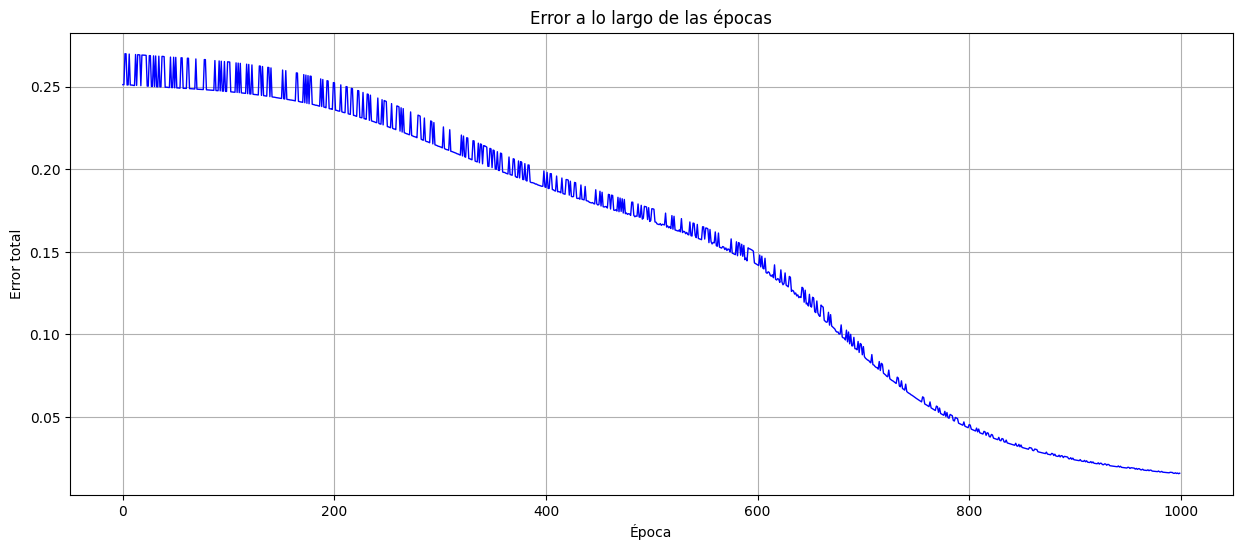

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(np.arange(epochs), clasificador.epochs_error, color='blue', linestyle='-', linewidth=1)
plt.title('Error a lo largo de las épocas')
plt.xlabel('Época')
plt.ylabel('Error total')
plt.grid(True)
